In [1]:
import numpy as np
import random

from utils.visualizer import scatter_matrix
from utils.model import create_model
from utils.data import get_npz_file
from utils.utils.constants import N

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


# Synthetic Dataset for the Observations

We synthesize observed data based on the following causal structure.

## anxiety <-- insomnia --> tiredness

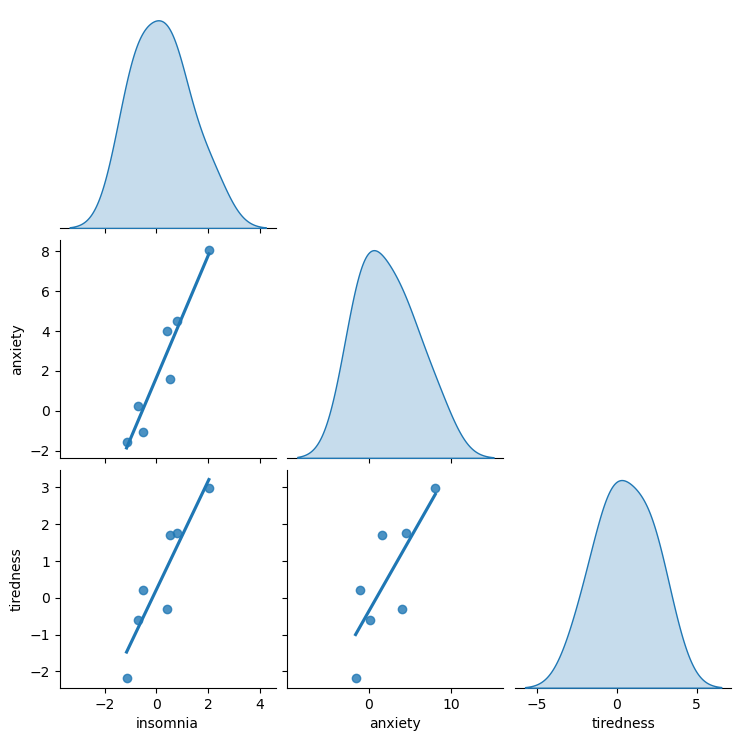

In [2]:
random.seed(10)
## Create Synthetic Data

insomnia = np.random.normal(size = N)
anxiety = np.random.normal(loc = 3*insomnia+1, size = N) 
tiredness = np.random.normal(loc = 2.*insomnia, size = N) 

#VISUALISATION
data = dict({"insomnia":insomnia,"anxiety":anxiety,"tiredness":tiredness})
scatter_matrix(data, vars = ['insomnia','anxiety','tiredness'])

# Get Bayesian inference \& Simulations of Interventions

In [3]:
## define causal models
causal_dags = [{"insomnia":[],"anxiety":["insomnia"],"tiredness":["insomnia"]},{"anxiety":[],"insomnia":["anxiety"],"tiredness":["insomnia"]},{"anxiety":[],"tiredness":["anxiety"],"insomnia":["anxiety","tiredness"]}]
# causal_dags = [{"insomnia":[],"anxiety":["insomnia"],"tiredness":["insomnia"]},{"anxiety":[],"insomnia":["anxiety"],"tiredness":["insomnia"]}]
# causal_dags = [{"insomnia":[],"anxiety":["insomnia"],"tiredness":["insomnia"]}]
## get PyMC3 probabilistic models
models = {}
for i,dag in enumerate(causal_dags):
    models[i] = create_model(dag, data)   
## compute causal inference and save it in npz files 
## This will take time!!
for i,m in models.items():
    get_npz_file(m, 'insomnia'+str(i))

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [noised_y_tiredness, b_tiredness_insomnia, sigma_tiredness, a_tiredness, noised_y_anxiety, b_anxiety_insomnia, sigma_anxiety, a_anxiety, noised_y_insomnia, sigma_insomnia, mu_insomnia]


Sampling 1 chain for 2_000 tune and 800 draw iterations (2_000 + 800 draws total) took 8 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


0, dim: obs_id, 7 =? 7
0, dim: obs_id, 7 =? 7
0, dim: obs_id, 7 =? 7


C:\Users\evita\Anaconda3\envs\myenv\lib\site-packages\pymc3\sampling.py:1707: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


C:\Users\evita\Anaconda3\envs\myenv\lib\site-packages\arviz\data\io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
posterior predictive variable insomnia's shape not compatible with number of chains and draws. This can mean that some draws or even whole chains are not represented.
posterior predictive variable anxiety's shape not compatible with number of chains and draws. This can mean that some draws or even whole chains are not represented.
posterior predictive variable tiredness's shape not compatible with number of chains and draws. This can mean that some draws or even whole chains are not represented.


0, dim: obs_id, 7 =? 7
0, dim: obs_id, 7 =? 7
0, dim: obs_id, 7 =? 7
i_var insomnia c 0.2636239811547081 i_value -2.592659161990797


C:\Users\evita\Anaconda3\envs\myenv\lib\site-packages\pymc3\sampling.py:1707: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


i_var insomnia c 0.2636239811547081 i_value -2.329035180836089


i_var insomnia c 0.2636239811547081 i_value -2.065411199681381


i_var insomnia c 0.2636239811547081 i_value -1.8017872185266728


i_var insomnia c 0.2636239811547081 i_value -1.5381632373719647


i_var insomnia c 0.2636239811547081 i_value -1.2745392562172566


i_var insomnia c 0.2636239811547081 i_value -1.0109152750625485


i_var insomnia c 0.2636239811547081 i_value -0.7472912939078404


i_var insomnia c 0.2636239811547081 i_value -0.48366731275313235


i_var insomnia c 0.2636239811547081 i_value -0.22004333159842426


i_var insomnia c 0.2636239811547081 i_value 0.043580649556283824


i_var insomnia c 0.2636239811547081 i_value 0.3072046307109919


i_var insomnia c 0.2636239811547081 i_value 0.5708286118657


i_var insomnia c 0.2636239811547081 i_value 0.8344525930204081


i_var insomnia c 0.2636239811547081 i_value 1.0980765741751162


i_var insomnia c 0.2636239811547081 i_value 1.3617005553298243


i_var insomnia c 0.2636239811547081 i_value 1.6253245364845323


i_var insomnia c 0.2636239811547081 i_value 1.8889485176392409


i_var insomnia c 0.2636239811547081 i_value 2.1525724987939485


i_var insomnia c 0.2636239811547081 i_value 2.416196479948656


i_var insomnia c 0.2636239811547081 i_value 2.6798204611033647


i_var insomnia c 0.2636239811547081 i_value 2.9434444422580732


i_var insomnia c 0.2636239811547081 i_value 3.207068423412781


i_var insomnia c 0.2636239811547081 i_value 3.4706924045674894


i_var anxiety c 0.7971515124450601 i_value -5.908190029636289


i_var anxiety c 0.7971515124450601 i_value -5.111038517191229


i_var anxiety c 0.7971515124450601 i_value -4.31388700474617


i_var anxiety c 0.7971515124450601 i_value -3.51673549230111


i_var anxiety c 0.7971515124450601 i_value -2.71958397985605


i_var anxiety c 0.7971515124450601 i_value -1.9224324674109905


i_var anxiety c 0.7971515124450601 i_value -1.1252809549659304


i_var anxiety c 0.7971515124450601 i_value -0.3281294425208712


i_var anxiety c 0.7971515124450601 i_value 0.46902206992418893


i_var anxiety c 0.7971515124450601 i_value 1.266173582369249


i_var anxiety c 0.7971515124450601 i_value 2.0633250948143083


i_var anxiety c 0.7971515124450601 i_value 2.8604766072593684


i_var anxiety c 0.7971515124450601 i_value 3.6576281197044285


i_var anxiety c 0.7971515124450601 i_value 4.454779632149489


i_var anxiety c 0.7971515124450601 i_value 5.251931144594547


i_var anxiety c 0.7971515124450601 i_value 6.049082657039607


i_var anxiety c 0.7971515124450601 i_value 6.846234169484667


i_var anxiety c 0.7971515124450601 i_value 7.643385681929727


i_var anxiety c 0.7971515124450601 i_value 8.440537194374787


i_var anxiety c 0.7971515124450601 i_value 9.237688706819846


i_var anxiety c 0.7971515124450601 i_value 10.034840219264906


i_var anxiety c 0.7971515124450601 i_value 10.831991731709968


i_var anxiety c 0.7971515124450601 i_value 11.629143244155026


i_var anxiety c 0.7971515124450601 i_value 12.426294756600086


i_var tiredness c 0.4261730360621483 i_value -4.498077225355912


i_var tiredness c 0.4261730360621483 i_value -4.071904189293764


i_var tiredness c 0.4261730360621483 i_value -3.6457311532316155


i_var tiredness c 0.4261730360621483 i_value -3.219558117169467


i_var tiredness c 0.4261730360621483 i_value -2.793385081107319


i_var tiredness c 0.4261730360621483 i_value -2.367212045045171


i_var tiredness c 0.4261730360621483 i_value -1.9410390089830227


i_var tiredness c 0.4261730360621483 i_value -1.5148659729208744


i_var tiredness c 0.4261730360621483 i_value -1.0886929368587261


i_var tiredness c 0.4261730360621483 i_value -0.6625199007965779


i_var tiredness c 0.4261730360621483 i_value -0.23634686473443


i_var tiredness c 0.4261730360621483 i_value 0.18982617132771828


i_var tiredness c 0.4261730360621483 i_value 0.6159992073898666


i_var tiredness c 0.4261730360621483 i_value 1.0421722434520149


i_var tiredness c 0.4261730360621483 i_value 1.4683452795141632


i_var tiredness c 0.4261730360621483 i_value 1.8945183155763115


i_var tiredness c 0.4261730360621483 i_value 2.3206913516384597


i_var tiredness c 0.4261730360621483 i_value 2.746864387700608


i_var tiredness c 0.4261730360621483 i_value 3.1730374237627563


i_var tiredness c 0.4261730360621483 i_value 3.5992104598249046


i_var tiredness c 0.4261730360621483 i_value 4.025383495887052


i_var tiredness c 0.4261730360621483 i_value 4.451556531949201


i_var tiredness c 0.4261730360621483 i_value 4.877729568011349


i_var tiredness c 0.4261730360621483 i_value 5.303902604073498


C:\Users\evita\Anaconda3\envs\myenv\lib\site-packages\arviz\data\inference_data.py:1216: UserWarning: The group atomic_intervention is not defined in the InferenceData scheme
  warnings.warn(
C:\Users\evita\Anaconda3\envs\myenv\lib\site-packages\arviz\data\inference_data.py:1227: UserWarning: the default dims 'chain' and 'draw' will be added automatically
  warnings.warn(
C:\Users\evita\Anaconda3\envs\myenv\lib\site-packages\arviz\data\inference_data.py:1216: UserWarning: The group shift_intervention is not defined in the InferenceData scheme
  warnings.warn(
C:\Users\evita\Anaconda3\envs\myenv\lib\site-packages\arviz\data\inference_data.py:1216: UserWarning: The group variance_intervention is not defined in the InferenceData scheme
  warnings.warn(
